# Linear Regression Implementation from Scratch

## Introduction-

I am Ritabrata Dutta, a Computer Science Engineering student from India, in this jupyter notebook, I will be attempting to implement Linear Regression from scratch and then compare it with a sci-kit learn model. 

For this we are going to use a salary dataset from kaggle: [https://www.kaggle.com/code/julongzhao/linear-regression](https://www.kaggle.com/code/julongzhao/linear-regression)

## Step 1-

Importing necessary libraries

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

## Step 2-
We are now going to load the data here

In [9]:
df = pd.read_csv('./datasets used/Salary_dataset.csv')

df.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


## Step 3-
We are going to plot it as is to see the relation between Experience and Salary

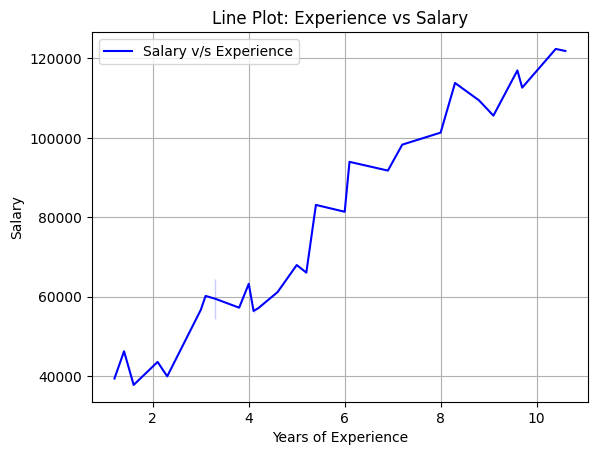

In [10]:
sns.lineplot(x= df['YearsExperience'], y= df['Salary'], color= 'blue', label= 'Salary v/s Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Line Plot: Experience vs Salary')
plt.legend()
plt.grid(True)
plt.show()

## Inference-

From the above graph it is evident that the relation between Salary and Years of Experience is non linear but can be summarized to a linear plot with a small error margin especially for the members with least and most experience group.

## Step 4-

Splitting the data into a train and test set and wrtitng the part to implement Linear regression and finding out R2 score

In [11]:
x = df['YearsExperience'].values
y = df['Salary'].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

xmean = np.mean(x_train)
ymean = np.mean(y_train)

num = np.sum((x_train - xmean) * (y_train - ymean))
den = np.sum((x_train - xmean) ** 2)
w1 = num / den
w0 = ymean - w1 * xmean

y_pred_test = w0 + w1 * x_test

ss_res = np.sum((y_test - y_pred_test) ** 2)
ss_tot = np.sum((y_test - np.mean(y_test)) ** 2)
r2 = 1 - (ss_res / ss_tot)

print(f"w0 (Intercept): {w0}")
print(f"w1 (Slope): {w1}")
print(f"R² Score: {r2}")

w0 (Intercept): 24380.201479473697
w1 (Slope): 9423.815323030978
R² Score: 0.9024461774180497


## Inference-

We were able to find out the slope and Intercept to make our predictions and after prediction we got a R2 score of 0.902(approx.)

## Step 5-
We will now plot the our predicted results to that which was given for the test set.

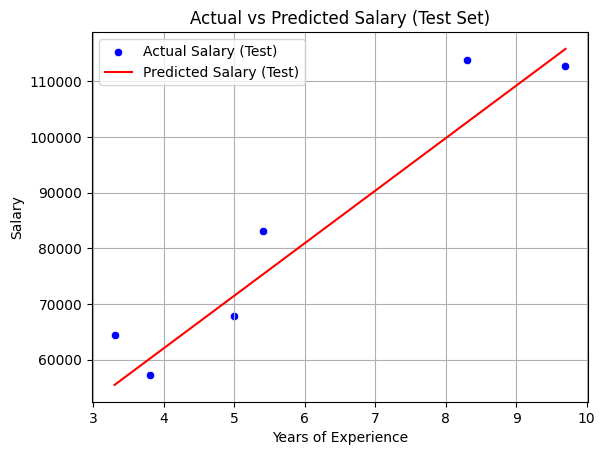

In [12]:
y_pred_test = w0 + w1 * x_test.flatten()

x_test_flat = x_test.flatten()

sorted_indices = x_test_flat.argsort()
x_test_sorted = x_test_flat[sorted_indices]
y_pred_sorted = y_pred_test[sorted_indices]

import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x=x_test_flat, y=y_test, color='blue', label='Actual Salary (Test)')

plt.plot(x_test_sorted, y_pred_sorted, color='red', label='Predicted Salary (Test)')

plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Actual vs Predicted Salary (Test Set)')
plt.legend()
plt.grid(True)
plt.show()

## Step 6-

Now that we are done with the implementation for the one which we made now we are going to implement the Linear Regression model from sci-kit learn for comparison

Test set R2 Score: 0.9024461774180497


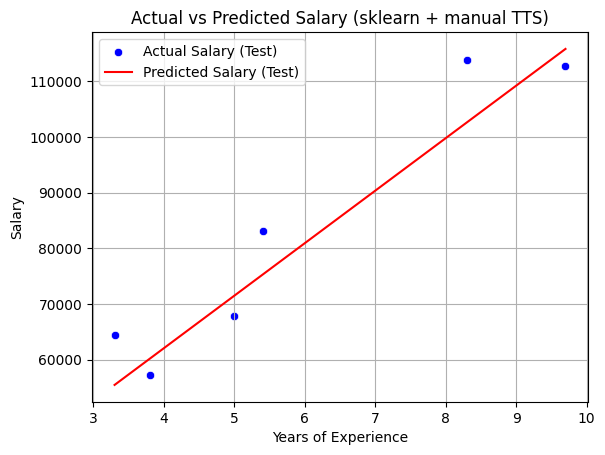

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

model = LinearRegression()

x_train = x_train.reshape(-1, 1)
x_test = x_test.reshape(-1, 1)

model.fit(x_train, y_train)

ypred_test = model.predict(x_test)

r2_test = r2_score(y_test, ypred_test)
print(f"Test set R2 Score: {r2_test}")

sns.scatterplot(x=x_test.flatten(), y=y_test, color='blue', label='Actual Salary (Test)')
sorted_indices = np.argsort(x_test.flatten())
plt.plot(x_test.flatten()[sorted_indices], ypred_test[sorted_indices], color='red', label='Predicted Salary (Test)')

plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Actual vs Predicted Salary (sklearn + manual TTS)')
plt.legend()
plt.grid(True)
plt.show()

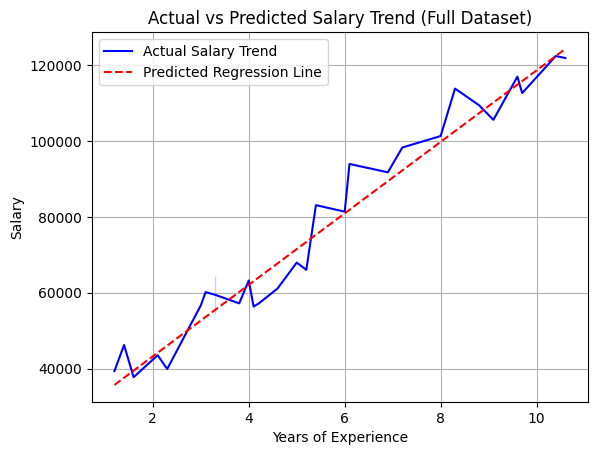

In [14]:
X_full = df['YearsExperience'].values.reshape(-1, 1)
y_full = df['Salary'].values

y_full_pred = model.predict(X_full)

sorted_idx = np.argsort(X_full.flatten())
X_sorted = X_full.flatten()[sorted_idx]
y_sorted = y_full[sorted_idx]
y_pred_sorted = y_full_pred[sorted_idx]

sns.lineplot(x=X_sorted, y=y_sorted, color='blue', label='Actual Salary Trend')

plt.plot(X_sorted, y_pred_sorted, color='red', linestyle='--', label='Predicted Regression Line')

plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Actual vs Predicted Salary Trend (Full Dataset)')
plt.legend()
plt.grid(True)
plt.show()

The above plot compares the Linear Regression plot(red dashed line) and the original trend plot(blue zigzag line).

## Conclusion-

In conclusion, our model was able to predict well in comparision to the scikit-learn model, for this simple dataset, as there is not much to implement.

Thanks for viewing this project of mine :)